
Name: Anuva Negi

ID: 1002238067

##Nearest Neighbor Classifier:



K-Nearest Neighbors (KNN) is a **simple, non-parametric** algorithm used for **classification** and regression. It makes predictions based on the similarity between data points, where **K** is the number of nearest neighbors considered. **For classification, it assigns the class most common among the K neighbors, and for regression, it averages the values of the K nearest points.**

In [38]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [39]:
unloaded = files.upload()

Saving dataset_KNN.csv to dataset_KNN (1).csv


In [40]:
df = pd.read_csv('dataset_KNN.csv')
df.head()  # give us an over view of first 5 rows in dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [41]:
df.info()  # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [42]:
df.isna().sum()  #to check NAN values per column

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [43]:
# missing data percentage per column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


<Axes: >

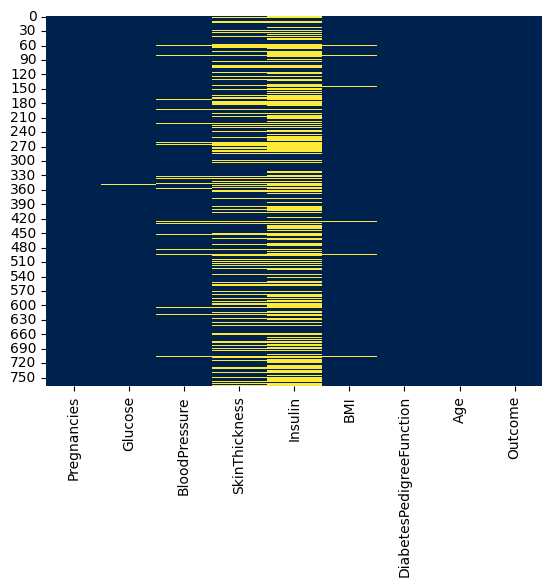

In [44]:
#heatmap for plotting data inorder to see if missing values present
sns.heatmap(df.isna(), cmap='cividis', cbar=False)

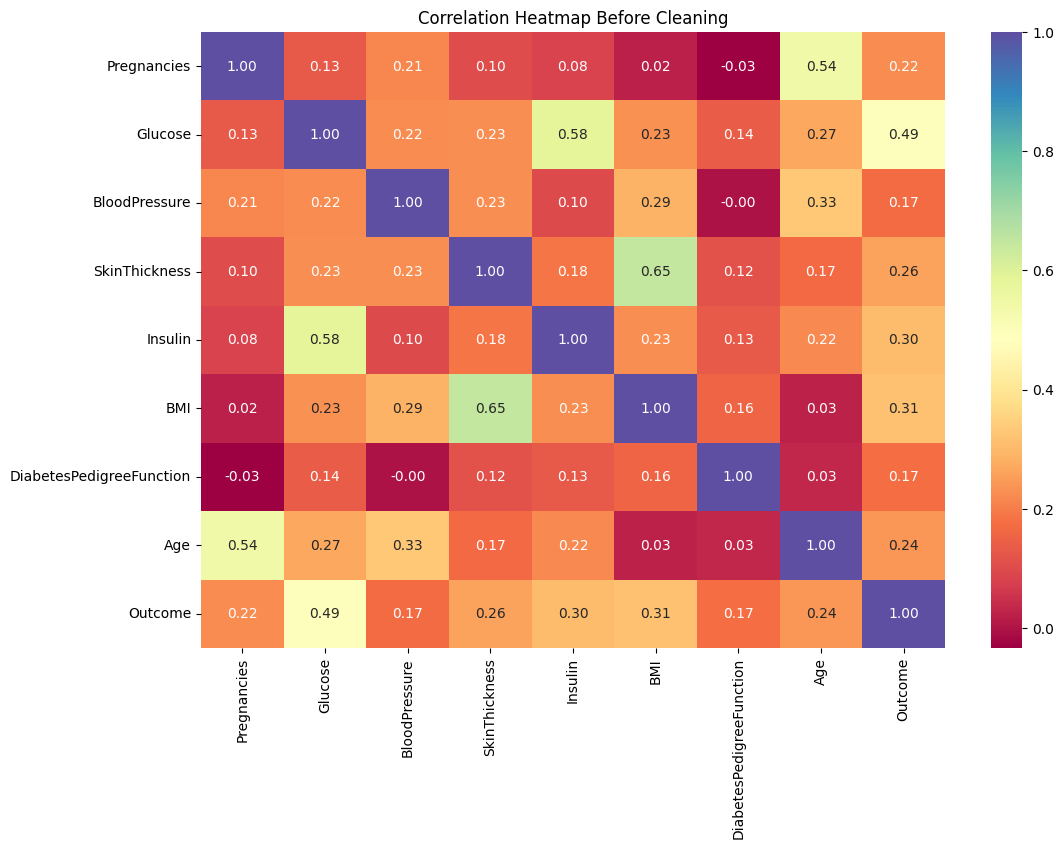

In [45]:
# Since the dataset is NUMERIC we can directly build correlation matrix
corr_before = df.corr()

# Plot heatmap before cleaning
plt.figure(figsize=(12, 8))
sns.heatmap(corr_before, annot=True, fmt='.2f', cmap='Spectral')
plt.title('Correlation Heatmap Before Cleaning')
plt.show()

In [46]:
df.columns   # list of columns present in df

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
orig_df = df.copy()  # before transformation and imputation saving the original dataframe

##Preprocessing

For glucose : going with mean imputation

In [48]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())

In [49]:
df['Glucose'].isna().sum()

0

for BMI: Checking presense of outliers

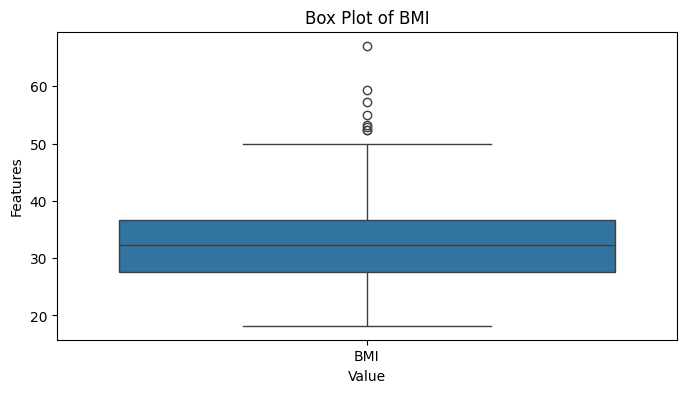

In [50]:
# Set the size of the plot
plt.figure(figsize=(8, 4))

# Create a box plot for all features in the dataset (since all are numeric)
sns.boxplot(data=df[['BMI']], orient="v")

# Adding title and labels
plt.title('Box Plot of BMI')
plt.xlabel('Value')
plt.ylabel('Features')

# Show the plot
plt.show()

In [51]:
df['BMI'].mean()

32.457463672391015

In [52]:
df['BMI'].median()

32.3

Though there is not much difference in the values for mean and median but since there are outliers present we opted for median imputation (not sensitive to outliers)

Similarly for BMI: We did Median Imputation

In [53]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['BMI'].isna().sum()

0

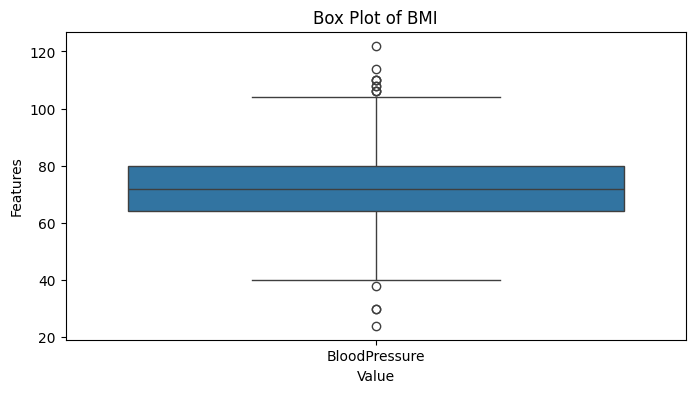

In [54]:
plt.figure(figsize=(8, 4))

# Create a box plot for all features in the dataset (since all are numeric)
sns.boxplot(data=df[['BloodPressure']], orient="v")

# Adding title and labels
plt.title('Box Plot of BMI')
plt.xlabel('Value')
plt.ylabel('Features')

# Show the plot
plt.show()

For BloodPressure: We did Median Imputation

In [55]:
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['BloodPressure'].isna().sum()

0

Checking for SkinThickness and Insulin - columns with highest no. of missing values

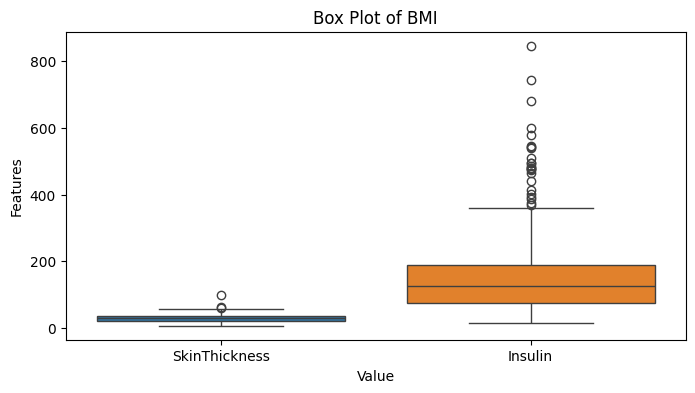

In [56]:
plt.figure(figsize=(8, 4))

# Create a box plot for all features in the dataset (since all are numeric)
sns.boxplot(data=df[['SkinThickness','Insulin']], orient="v")

# Adding title and labels
plt.title('Box Plot of BMI')
plt.xlabel('Value')
plt.ylabel('Features')

# Show the plot
plt.show()

In [57]:
df_bef_impute = df.copy()

In [58]:
#df = df_bef_impute.copy()  # to revert to previous copy if required

In [59]:
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [60]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


<Axes: >

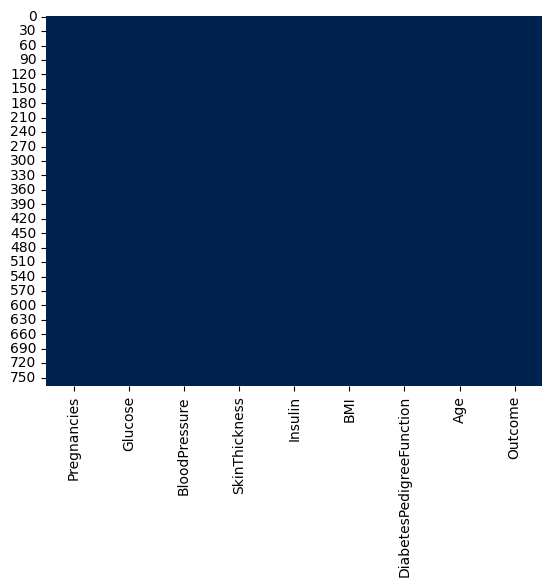

In [61]:
#plotting our cleaned dataset
sns.heatmap(df.isna(), cmap='cividis', cbar=False)

###Pearson's Correlation Coefficient and Heatmap

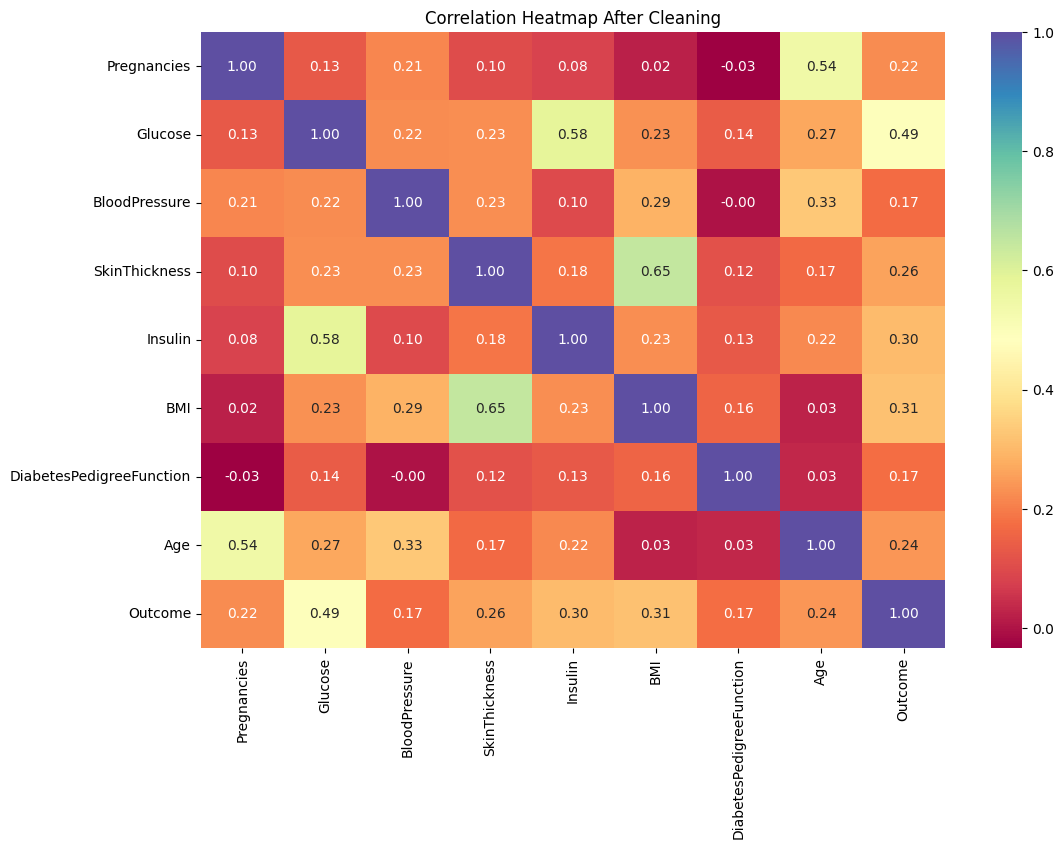

In [62]:
#before
plt.figure(figsize=(12, 8))
sns.heatmap(corr_before, annot=True, fmt='.2f', cmap='Spectral')
plt.title('Correlation Heatmap After Cleaning')
plt.show()

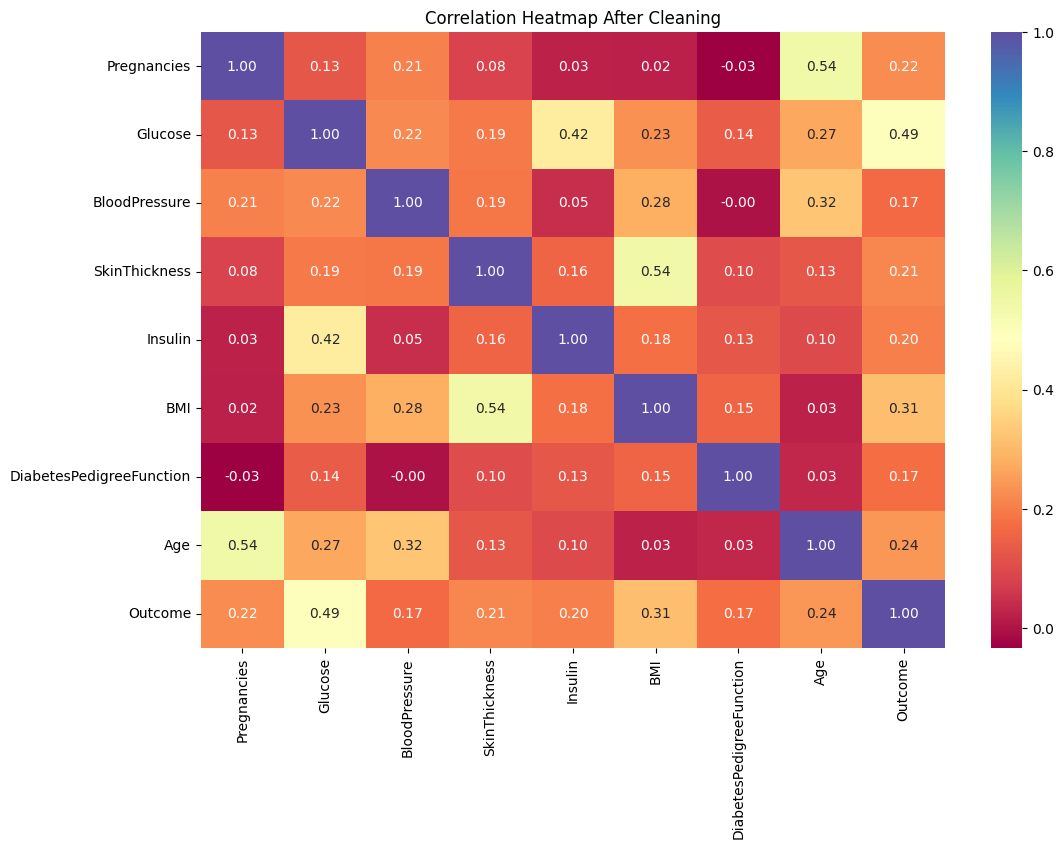

In [63]:
#after
corr_after = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_after, annot=True, fmt='.2f', cmap='Spectral')
plt.title('Correlation Heatmap After Cleaning')
plt.show()

##Scaling the Data (by StandardScaler)

In [64]:
from sklearn.preprocessing import StandardScaler

# Separating features and target column - Outcome
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


###Scaling is Important in KNN:
KNN relies on **distance calculations** (eg Euclidean distance) to find the nearest neighbors. If the features are on different scales (e.g., age vs income), features with larger ranges dominate the distance computation, leading to biased results. **Scaling** (e.g., using StandardScaler or MinMaxScaler) ensures all features contribute equally to the distance calculation, improving the model's performance and fairness in evaluating the similarity between data points.


##Spliting the Dataset and Cross-Validation

In [65]:
# Split the dataset into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize the KNN classifier - with default value for k
knn = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.77586207 0.73913043 0.71304348 0.73913043 0.7826087 ]
Average cross-validation score: 0.7499550224887555
Standard deviation of cross-validation scores: 0.025823411562052596


In [66]:
# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print('\n')
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[92 31]
 [25 44]]


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       123
           1       0.59      0.64      0.61        69

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.71      0.71      0.71       192



###Elbow Method

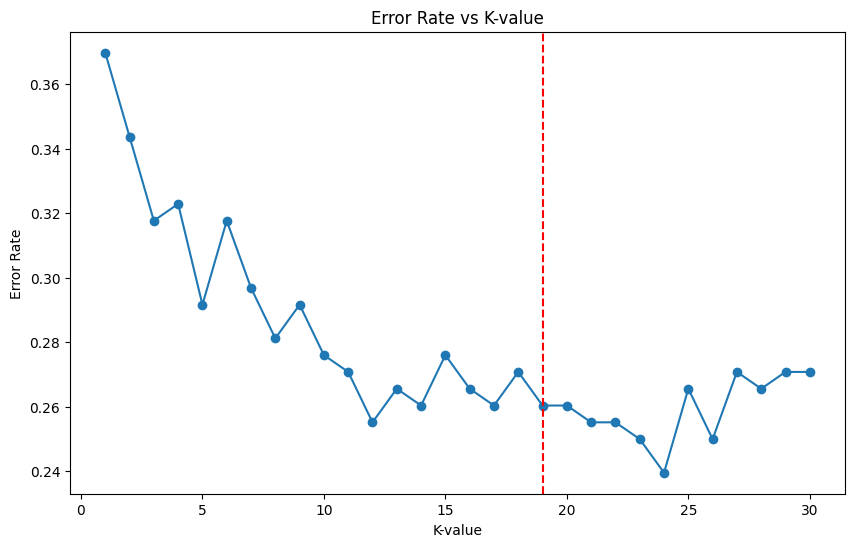

In [67]:
error_rate = []

# Testing different values of k
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_k != y_test))

# Plotting the error rate and finding best k with elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rate, marker='o')
plt.title('Error Rate vs K-value')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.axvline(x=19, color='r', linestyle='--')
plt.show()

In [68]:
# With Best value of k found from the above graph train the classifier
knn = KNeighborsClassifier(n_neighbors=19, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

###3 Best Features (based on highest correlation)

In [69]:
# Get the absolute correlation values with the Outcome column
target_corr = corr_after['Outcome'].abs()

# Selecting the top 3 features with the highest correlation with the Outcome
top_features = target_corr.nlargest(4).index.tolist()  # 4 because we also want to include the target itself

# Excluding Outcome from the feature list
best_features = [feature for feature in top_features if feature != df.columns[-1]]

print("Three best features based on Pearson's correlation:", best_features)

Three best features based on Pearson's correlation: ['Glucose', 'BMI', 'Age']


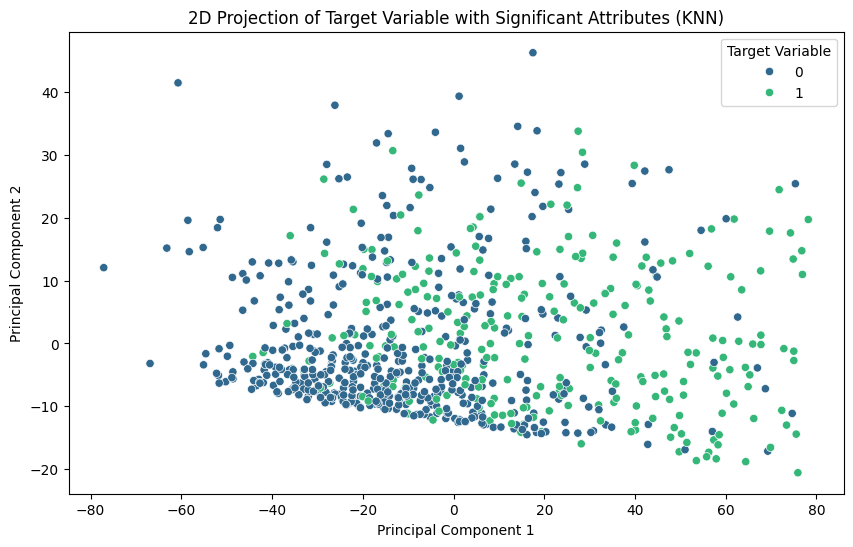

In [70]:
from sklearn.decomposition import PCA
features = df[['Glucose', 'BMI', 'Age']]
target = df['Outcome']

# Performing PCA for 2D projection
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

# Creating a new DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Outcome'] = df['Outcome']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Outcome', palette='viridis')
plt.title('2D Projection of Target Variable with Significant Attributes (KNN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target Variable')
plt.show()


Principal Components: are the new features created by PCA that capture the most variance in the original data. They are linear combinations of the original features.
Here for example, PCA(n_components=2) means that PCA will transform the datasent with 3 best features into a new space with two dimensions (two principal components).

**The other 3 could be**(Based on correlation matrix):

['Pregnancies', 'SkinThickness', 'Insulin']

### Checking for 3 different values of K

In [73]:
k_values = [15,19,25]  # some k values found
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"K = {k}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


K = 15
[[100  23]
 [ 30  39]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       123
           1       0.63      0.57      0.60        69

    accuracy                           0.72       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192

K = 19
[[105  18]
 [ 32  37]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       123
           1       0.67      0.54      0.60        69

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.73      0.74      0.73       192

K = 25
[[101  22]
 [ 29  40]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       123
           1       0.65      0.58      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70     

We can see confusion matrix for k = 15, 19, 25.

If we assume **Outcome** column be person having diabetes or not then in that case we will try to **minimize FN** (False Negatives - as this is more dangereous in this scenario) **and trade off it with False Positives.**

Hence we will consider K=19 as the best choice here (k = 25 also gives good results but we should keep K value reasonable to avoid complexity)

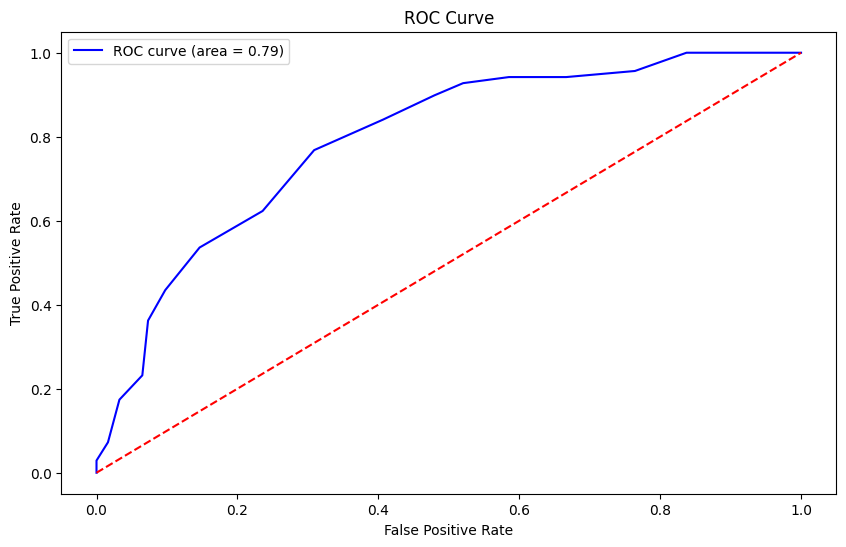

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

knn = KNeighborsClassifier(n_neighbors=19,metric='euclidean')
knn.fit(X_train, y_train)
y_pred_prob = knn.predict_proba(X_test)[:, 1] # probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plot random diagonal guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
